<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Options_Trading_JumpDiffusion_Model_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed
Consider selling the stock.
Current AAPL stock price: $181.4499969482422 (€168.32)
Current option price: $121.9
Predicted AAPL stock price: $152.82094272546263 (€141.76)
Current AAPL stock price (USD): $181.38999938964844
Current AAPL stock price (EUR): €168.32
Current option price (USD): $121.5
Current option price (EUR): €112.71
Price difference (USD): $0.96
Price difference (EUR): €0.89
Consider selling the stock.


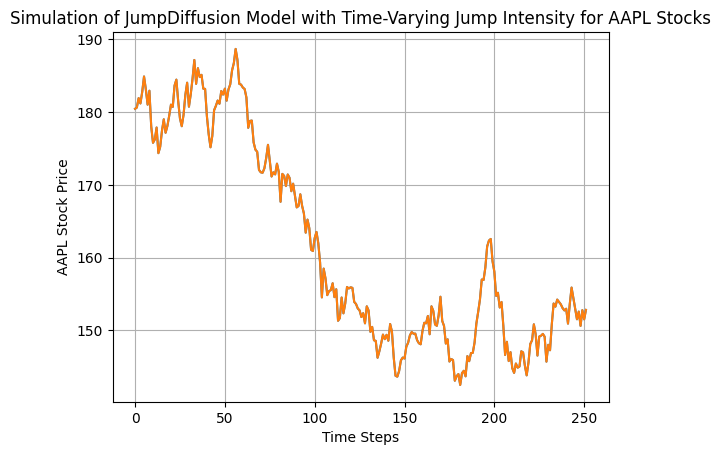

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
!pip install forex_python
from forex_python.converter import CurrencyRates

# Define function to get stock price from Yahoo Finance
def get_stock_price(symbol, start_date):
    df = yf.download(symbol, start=start_date)
    return df['Adj Close'][0]

# Define functions for the JumpDiffusion model
def jump_diffusion_model(S0, r, sigma, delta_t, num_steps, jump_intensity):
    stock_prices = np.zeros(num_steps)
    stock_prices[0] = S0

    mu = 0.05  # Define the mean jump size

    for i in range(1, num_steps):
        z1 = np.random.normal(0, 1)
        z2 = np.random.normal(0, 1)
        N = np.random.poisson(jump_intensity[i] * delta_t)

        stock_prices[i] = stock_prices[i-1] * (1 + r * delta_t + sigma * np.sqrt(delta_t) * z1)
        stock_prices[i] += stock_prices[i-1] * (mu - 0.5 * sigma**2) * N * delta_t
        stock_prices[i] += stock_prices[i-1] * sigma * np.sqrt(N * delta_t) * z2

    return stock_prices

# Define parameters for the JumpDiffusion model
start_date = '2022-01-01'  # Specify the start date for collecting the stock price
symbol = 'AAPL'  # Stock symbol for Apple Inc.
S0 = get_stock_price(symbol, start_date)  # Get the initial stock price of AAPL from Yahoo Finance

# Fetch the current market price of AAPL stock and option price
stock_data = yf.Ticker(symbol)
current_stock_price = stock_data.history(period='1d')['Close'].iloc[-1]
option_chain = stock_data.option_chain()
current_option_price = option_chain.calls['lastPrice'].iloc[0]  # Assuming the first call option in the chain

# Define remaining parameters for the JumpDiffusion model
r = 0.05
sigma = 0.2
delta_t = 1/252
num_steps = 252

# Generate simulated stock prices using the JumpDiffusion model with time-varying jump intensity
jump_intensity = np.random.rand(num_steps) * 0.2 + 0.9  # Example: Time-varying jump intensity between 0.9 and 1.1
stock_prices = jump_diffusion_model(S0, r, sigma, delta_t, num_steps, jump_intensity)

# Compare market price with initial price
price_difference = current_stock_price - S0

# Determine whether to buy or sell the stock based on the price difference
if price_difference > 0:
    print("Consider selling the stock.")
elif price_difference < 0:
    print("Consider buying the stock.")
else:
    print("No specific recommendation. Monitor the market closely.")

# Convert the current and predicted stock prices to euros
c = CurrencyRates()
current_stock_price_eur = c.convert('USD', 'EUR', current_stock_price)
predicted_stock_price_eur = c.convert('USD', 'EUR', stock_prices[-1])

# Output the comparison results
print(f"Current AAPL stock price: ${current_stock_price} (€{current_stock_price_eur:.2f})")
print(f"Current option price: ${current_option_price}")
print(f"Predicted AAPL stock price: ${stock_prices[-1]} (€{predicted_stock_price_eur:.2f})")

# Output the comparison results
print(f"Current AAPL stock price (USD): ${current_stock_price_usd}")
print(f"Current AAPL stock price (EUR): €{current_stock_price_eur:.2f}")
print(f"Current option price (USD): ${current_option_price_usd}")
print(f"Current option price (EUR): €{current_option_price_eur:.2f}")
print(f"Price difference (USD): ${price_difference_usd:.2f}")
print(f"Price difference (EUR): €{price_difference_eur:.2f}")
print(recommendation)

# Plot the simulated stock prices
plt.plot(stock_prices)
plt.xlabel('Time Steps')
plt.ylabel('AAPL Stock Price')
plt.title('Simulation of JumpDiffusion Model with Time-Varying Jump Intensity for AAPL Stocks')
plt.grid(True)


# Plot the simulated stock prices
plt.plot(stock_prices)
plt.xlabel('Time Steps')
plt.ylabel('AAPL Stock Price')
plt.title('Simulation of JumpDiffusion Model with Time-Varying Jump Intensity for AAPL Stocks')
plt.grid(True)

# Show the plot of simulated stock prices
plt.show()



Options Trading Simulation with JumpDiffusion Model for AAPL Stock